Simple bot on some food data.

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
s = open("C:/Users/1/Desktop/food.xml", "r", encoding="utf-8")
lines = s.readlines()
mtriples = []
for line in lines:
    if "mtriple" in line:
        mtriples.append(line)

In [3]:
data = []
labels = ["subject", "relation", "object"]
relations = ["country", "ingredient", "family"]

for item in mtriples:
    res = re.findall("<mtriple>.+?</mtriple>", item)
    for item in res:
        item = item.replace("</mtriple>", "").replace("<mtriple>", "").replace(" ", "")
        res_new = item.split("|")
        if res_new[1] in relations:
            res_new[0] = res_new[0].lower().replace("_", " ")
            if res_new[1] == "ingredient":
                res_new[2] = res_new[2].lower()
            res_final = []
            for item in res_new:
                item = item.replace("_", " ")
                res_final.append(item)
            data.append(res_final)

In [4]:
df = pd.DataFrame.from_records(data, columns=labels)
print (df.head())

     subject    relation     object
0  ajoblanco     country      Spain
1  ajoblanco  ingredient     almond
2  ajoblanco  ingredient      bread
3  ajoblanco  ingredient     garlic
4  ajoblanco  ingredient  olive oil


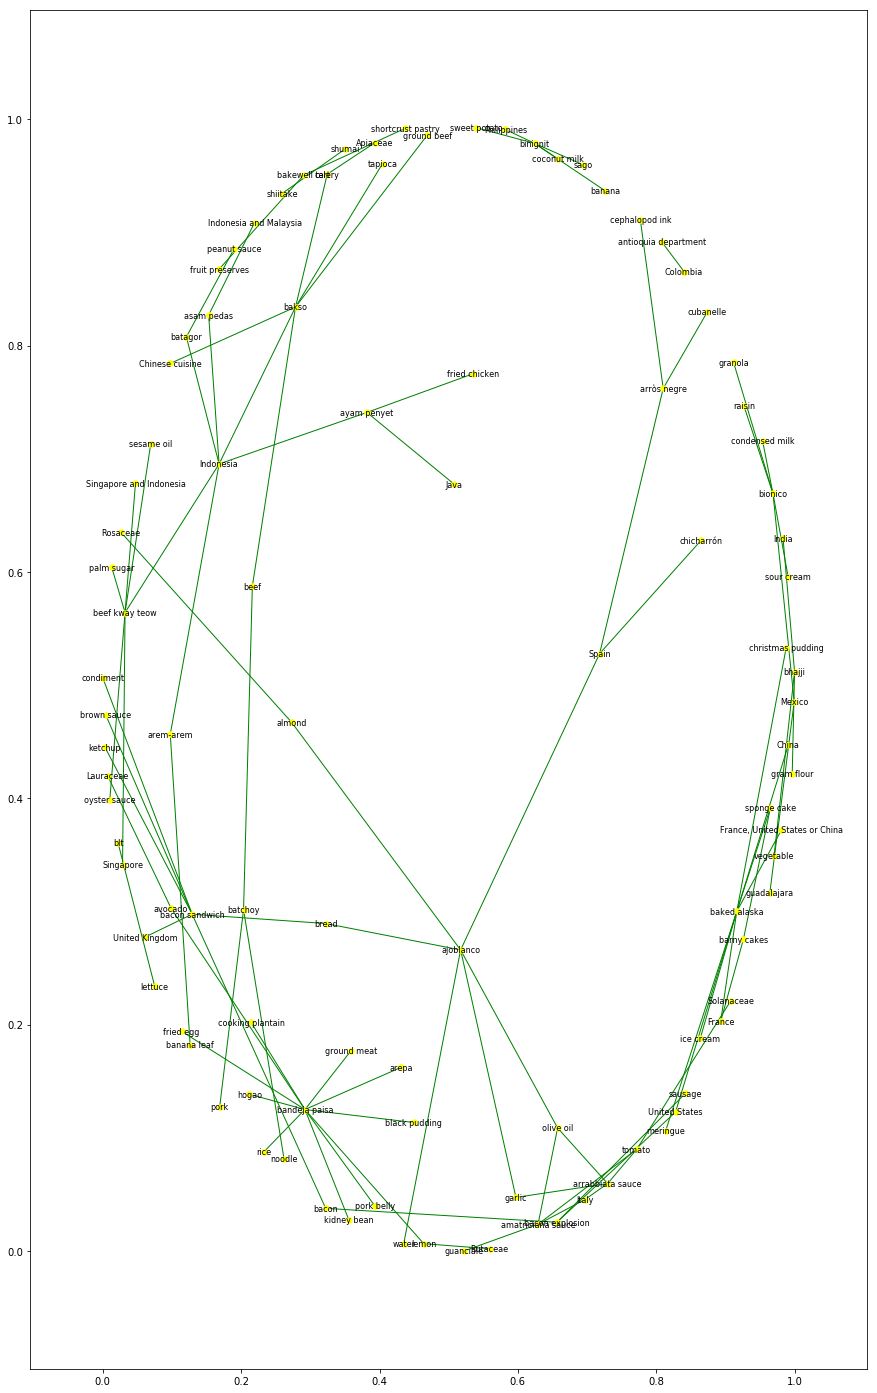

In [5]:
G = nx.from_pandas_dataframe(df, 'subject', 'object', edge_attr = 'relation')
plt.figure(figsize=(15,25))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = "yellow", node_size = 30)
nx.draw_networkx_edges(G, pos, edge_color = "green")
nx.draw_networkx_labels(G, pos, font_size=8)
plt.show()

Posing questions: "What country does X originate from?" "What are the ingredients of X?" "Which plant family does X belong to?"

In [6]:
def get_subject(question):
    for node in G.nodes():
        if node in question:
            return node

ingrs = []
def get_answer(subject):
    if subject != None:
        for edge in G.edges(subject):
            for key, val in G.get_edge_data(edge[0], edge[1]).items():
                if val == "country" and "country" in question:
                    return edge[1]
                if val == "ingredient" and "ingredient" in question:
                    ingrs.append(edge[1])
                if val == "family" and "family" in question:
                    return edge[1]
        return ", ". join(ingrs)
    else:
        return ("Sorry, I don't know.")

num_quests = 0
while num_quests < 4:
    question = str(input())
    subject = get_subject(question)
    answer = get_answer(subject)
    print (answer)
    print ("\n")
    num_quests += 1

What country does baked alaska originate from?
France, United States or China


What are the ingredients of ajoblanco?
almond, bread, garlic, olive oil, water


Which plant family does celery belong to?
Apiaceae


What country does bortsch originate from?
Sorry, I don't know.


